In [36]:

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import plot_model
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
# # Create the model
# model = models.Sequential()
# model.add(layers.Conv2D(64, (11,11), activation='relu', input_shape=(128, 128, 3))) 
# model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))
          
# model.add(layers.Conv2D(128, (11,11), activation='relu')) 
# model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))
          
# # Add new layers
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(6, activation='softmax'))

# # Show a summary of the model. Check the number of trainable parameters
# model.summary()


# Create the model
model = models.Sequential()
model.add(layers.Conv2D(input_shape=(128,128,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size=(5,5), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(7,7), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256, kernel_size=(7,7), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=128,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=6, activation="softmax"))


# keras.callbacks.callbacks.EarlyStopping(monitor='acc', baseline=0.97, verbose=0, mode='auto')
# opt = Adam(lr=0.0001)
# model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['acc'])
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 128)      

In [37]:
import os
base_dir = '/kaggle/input/duth-cv-2019-2020-hw-4/vehicles'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.3,
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   rotation_range=40,
                                  )
val_datagen  = ImageDataGenerator(rescale=1./255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=120,
                                                    class_mode='categorical',
                                                    # color_mode='grayscale',
                                                    target_size=(128,128),
                                                    shuffle=True)     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  val_datagen.flow_from_directory(validation_dir,
                                                        batch_size=120,
                                                        class_mode='categorical',
                                                        #  color_mode='grayscale',
                                                         target_size=(128,128)) 

Found 2494 images belonging to 6 classes.
Found 311 images belonging to 6 classes.


Epoch 1/100
21/20 [==============================] - 24s 1s/step - loss: 1.7580 - acc: 0.2233 - val_loss: 1.6152 - val_acc: 0.2797

Epoch 00001: val_acc improved from -inf to 0.27974, saving model to small_last4.h5
Epoch 2/100
21/20 [==============================] - 23s 1s/step - loss: 1.6530 - acc: 0.3256 - val_loss: 1.4451 - val_acc: 0.3730

Epoch 00002: val_acc improved from 0.27974 to 0.37299, saving model to small_last4.h5
Epoch 3/100
21/20 [==============================] - 23s 1s/step - loss: 1.5509 - acc: 0.3673 - val_loss: 1.4217 - val_acc: 0.4469

Epoch 00003: val_acc improved from 0.37299 to 0.44695, saving model to small_last4.h5
Epoch 4/100
21/20 [==============================] - 22s 1s/step - loss: 1.5065 - acc: 0.3974 - val_loss: 1.4049 - val_acc: 0.4534

Epoch 00004: val_acc improved from 0.44695 to 0.45338, saving model to small_last4.h5
Epoch 5/100
21/20 [==============================] - 22s 1s/step - loss: 1.4448 - acc: 0.4206 - val_loss: 1.5332 - val_acc: 0.4534


21/20 [==============================] - 23s 1s/step - loss: 0.8602 - acc: 0.6893 - val_loss: 0.9944 - val_acc: 0.6109

Epoch 00043: val_acc did not improve from 0.66881
Epoch 44/100
21/20 [==============================] - 22s 1s/step - loss: 0.8370 - acc: 0.6868 - val_loss: 1.5802 - val_acc: 0.5370

Epoch 00044: val_acc did not improve from 0.66881
Epoch 45/100
21/20 [==============================] - 22s 1s/step - loss: 0.8241 - acc: 0.6848 - val_loss: 1.0741 - val_acc: 0.6559

Epoch 00045: val_acc did not improve from 0.66881
Epoch 46/100
21/20 [==============================] - 23s 1s/step - loss: 0.8094 - acc: 0.6965 - val_loss: 1.2011 - val_acc: 0.5884

Epoch 00046: val_acc did not improve from 0.66881
Epoch 47/100
21/20 [==============================] - 22s 1s/step - loss: 0.8142 - acc: 0.7029 - val_loss: 0.7485 - val_acc: 0.6752

Epoch 00047: val_acc improved from 0.66881 to 0.67524, saving model to small_last4.h5
Epoch 48/100
21/20 [==============================] - 22s 1s/s

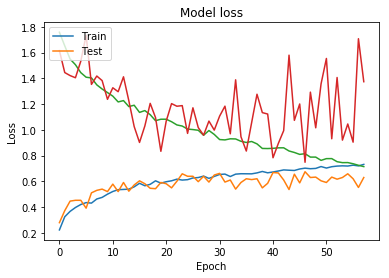

In [39]:
# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])
# # Train the model
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=train_generator.samples/train_generator.batch_size ,
#       epochs=1,
#       validation_data=validation_generator,
#       validation_steps=validation_generator.samples/validation_generator.batch_size,
#       verbose=1)
 
# # Save the model
# model.save('small_last4.h5')


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
earlyStopping = keras.callbacks.callbacks.EarlyStopping(monitor='val_acc', patience=11, verbose=1, mode='max')
mcp_save = keras.callbacks.callbacks.ModelCheckpoint('small_last4.h5', save_best_only=True, monitor='val_acc', mode='max',period=1,verbose=1)

# reduce_lr_loss = keras.callbacks.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1,min_delta=1e-4,
#                                                              mode='min')
# Train the model
history = model.fit_generator(train_generator,
                              callbacks=[earlyStopping, mcp_save], 
                              steps_per_epoch=train_generator.samples/train_generator.batch_size ,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples/validation_generator.batch_size,
                              verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Save the model
model.save('small_last4.h5')



In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
from keras.preprocessing import image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import csv

model = tf.keras.models.load_model('/kaggle/working/small_last4.h5')
rowlist = [['Id', 'Category']]

for dirname, _, filenames in os.walk('/kaggle/input/duth-cv-2019-2020-hw-4/vehicles/test'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        img = image.load_img(path, target_size=(128, 128), grayscale=False, interpolation='bilinear')
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        
        classes_pred = model.predict(x)
        cls_pred = np.argmax(classes_pred)
        rowlist.append([filename, cls_pred])
        #print(filename, cls_pred)
        with open('output.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(rowlist)
        